In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [35]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [36]:
inf = pd.read_csv('PCOS_infertility.csv')
woinf = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name= 'Full_new')

In [37]:
# Looking at the data with infertile patients.

inf.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [38]:
# Looking at the data with non-infertile patients.

woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [39]:
# Looking at the columns of data with non-infertile patients.

woinf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [40]:
# Merging the two files as per patient file no.
# The files were sorted into two based on patients with infertility and without infertility

data = pd.merge(woinf,inf, on='Patient File No.', suffixes=('','_wo'),how='left')

In [41]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_wo,PCOS (Y/N)_wo,I beta-HCG(mIU/mL)_wo,II beta-HCG(mIU/mL)_wo,AMH(ng/mL)_wo
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,3,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,5,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,15,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,2,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,4,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Dropping the repeated features after merging.

data =data.drop(['Unnamed: 44', 'Sl. No_wo', 'PCOS (Y/N)_wo', '  I   beta-HCG(mIU/mL)_wo','II    beta-HCG(mIU/mL)_wo', 'AMH(ng/mL)_wo'], axis=1)

In [43]:
# Changing the title of the properties.

data = data.rename(columns = {"PCOS (Y/N)":"Target"})

In [44]:
# Dropping unnecessary features.

data = data.drop(["Sl. No","Patient File No."],axis = 1)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Target                  541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [46]:
# Dealing with categorical values.
# In this database the type objects are numeric values saved as strings.
# So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')

data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

In [47]:
data.isnull().sum()

Target                    0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    1
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                1
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [48]:
# Dealing with missing values. 
# Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)

data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)

data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)

data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

In [49]:
# Clearing up the extra space in the column names.

data.columns = [col.strip() for col in data.columns]

In [50]:
data.head()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [71]:
data.Target.value_counts()

Target
0    364
1    177
Name: count, dtype: int64

In [51]:
def bar_plot(variable):
    """
     input: variable example : Target
     output: bar plot & value count
     
    """
    # Get feature
    var = data[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color= ['#670067','#008080'])
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

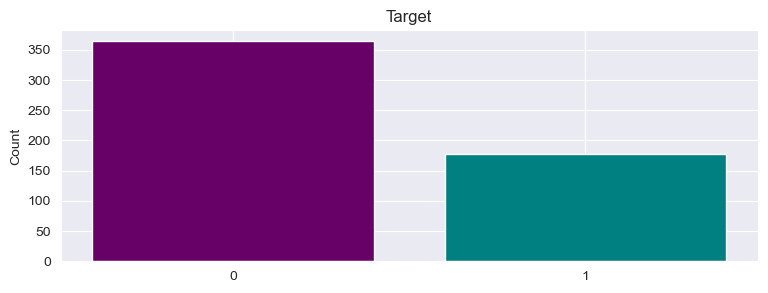

Target: 
 Target
0    364
1    177
Name: count, dtype: int64


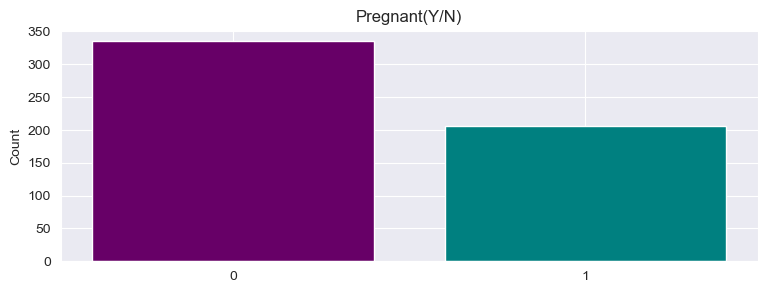

Pregnant(Y/N): 
 Pregnant(Y/N)
0    335
1    206
Name: count, dtype: int64


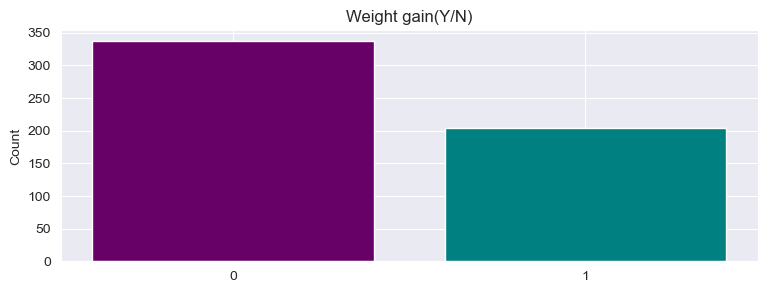

Weight gain(Y/N): 
 Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64


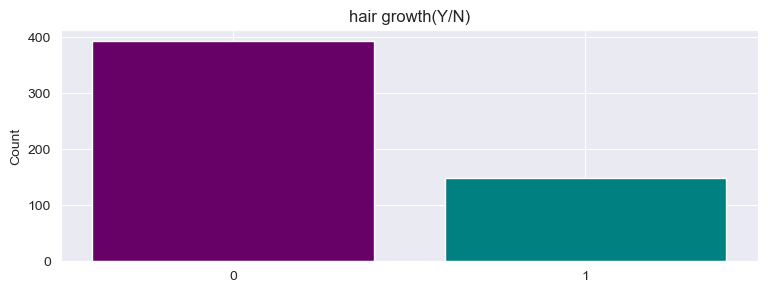

hair growth(Y/N): 
 hair growth(Y/N)
0    393
1    148
Name: count, dtype: int64


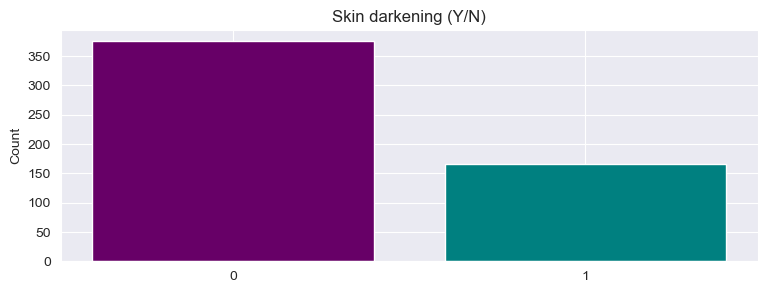

Skin darkening (Y/N): 
 Skin darkening (Y/N)
0    375
1    166
Name: count, dtype: int64


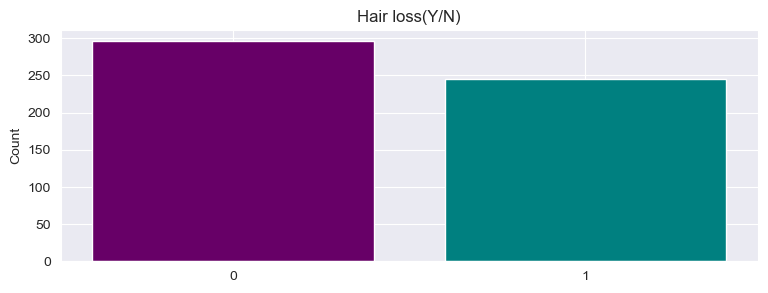

Hair loss(Y/N): 
 Hair loss(Y/N)
0    296
1    245
Name: count, dtype: int64


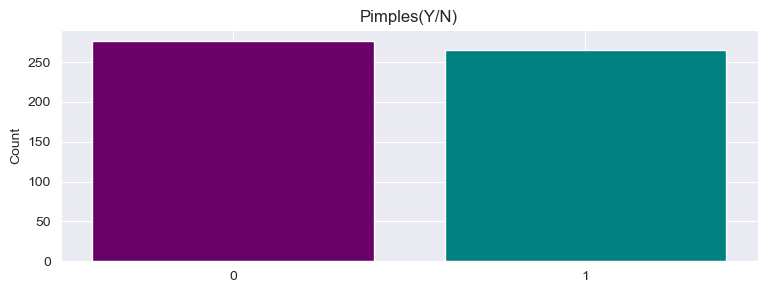

Pimples(Y/N): 
 Pimples(Y/N)
0    276
1    265
Name: count, dtype: int64


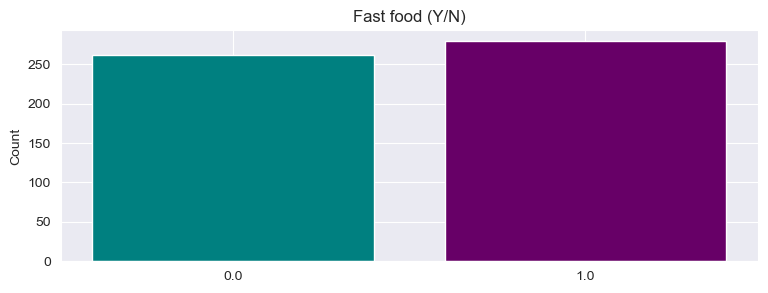

Fast food (Y/N): 
 Fast food (Y/N)
1.0    279
0.0    262
Name: count, dtype: int64


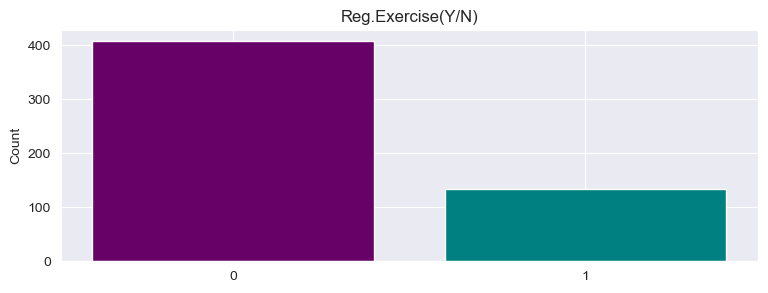

Reg.Exercise(Y/N): 
 Reg.Exercise(Y/N)
0    407
1    134
Name: count, dtype: int64


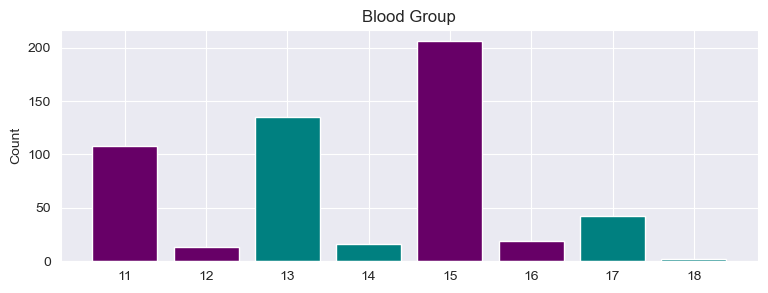

Blood Group: 
 Blood Group
15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: count, dtype: int64


In [19]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

In [52]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

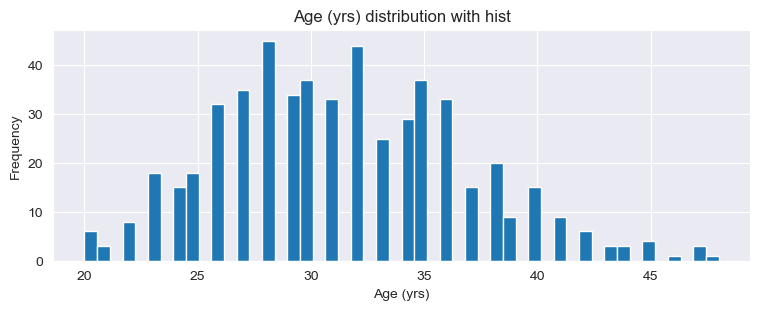

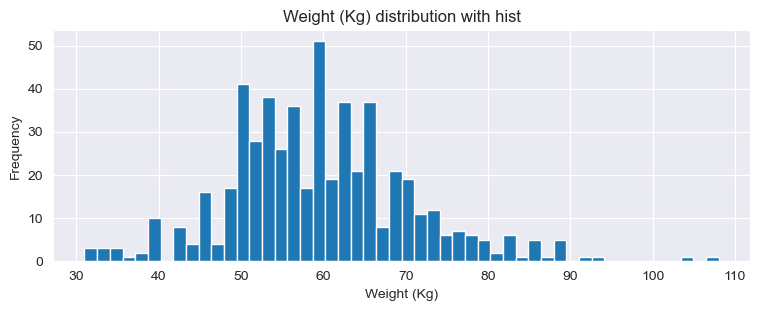

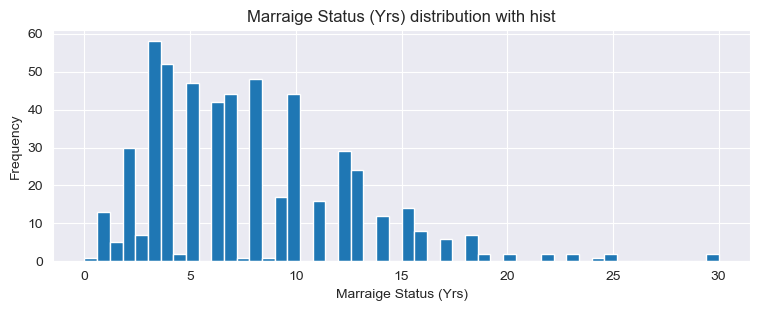

In [21]:
numericVar = ["Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

In [53]:
# Having a look at some basic statistical details.

data.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [54]:
# How all the features correlate with the PCOS. 

data.corr()['Target'].sort_values(ascending=False)

Target                    1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
AMH(ng/mL)                0.264141
Weight (Kg)               0.211938
BMI                       0.199534
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group               0.036433
II    beta-HCG(mIU/m

In [55]:
#Assiging the features (X)and target(y).

X= data.drop(labels = ["Target"],axis = 1)
y=data.Target

In [56]:
#Splitting the data into test and training sets.

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

In [57]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 324
X_test 217
y_train 324
y_test 217


In [58]:
# XGBRF Classifier
xgb_clf = xgboost.XGBRFClassifier()
xgb_clf.fit(X_train,y_train)
acc_xgb_clf_train = round(xgb_clf.score(X_train, y_train)*100,2) 
acc_xgb_clf_test = round(xgb_clf.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_xgb_clf_train))
print("Testing Accuracy: % {}".format(acc_xgb_clf_test))

Training Accuracy: % 97.53
Testing Accuracy: % 85.71


In [64]:
y_pred=xgb_clf.predict(X_test)
from sklearn.metrics import  classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       146
           1       0.87      0.66      0.75        71

    accuracy                           0.86       217
   macro avg       0.86      0.81      0.83       217
weighted avg       0.86      0.86      0.85       217



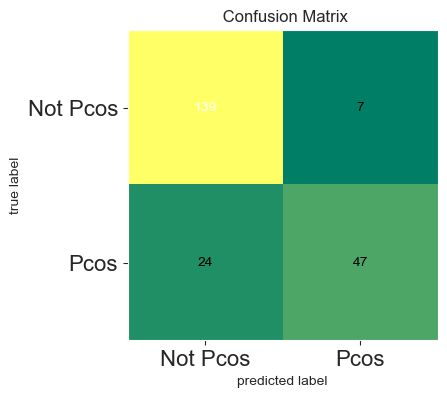

In [65]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, figsize=(4,6), hide_ticks=True, cmap=plt.cm.summer)
plt.title(" Confusion Matrix")
plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
plt.show()

In [68]:
y_train.value_counts()

Target
0    218
1    106
Name: count, dtype: int64

In [67]:
# Apply SMOTE to generate synthetic samples for balancing
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

Target
0    218
1    218
Name: count, dtype: int64

In [69]:
model = xgboost.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0.01, 0.1, 1] 
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Best model and parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_lambda': 0.1, 'subsample': 0.8}


In [75]:
# Create an XGBoost model with class weight adjustment
model = xgboost.XGBClassifier(
    objective='binary:logistic',
    colsample_bytree=0.6,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    reg_lambda=0.1,
    subsample=0.8,
    scale_pos_weight=(364/177),
    use_label_encoder=False,# To avoid a specific warning from XGBoost
    eval_metric='logloss',# Ensuring log loss is used as the eval metric for binary classification  
)

# Train the model using the balanced dataset
model.fit(X_train_smote, y_train_smote)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       146
           1       0.82      0.79      0.81        71

    accuracy                           0.88       217
   macro avg       0.86      0.85      0.86       217
weighted avg       0.87      0.88      0.87       217



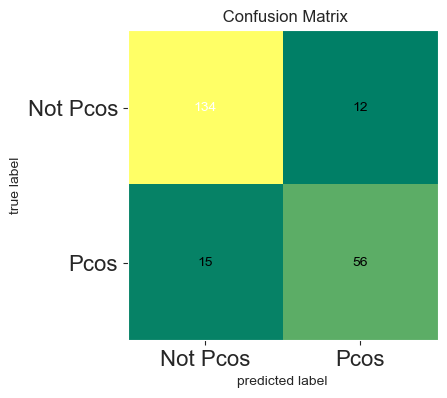

In [77]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, figsize=(4,6), hide_ticks=True, cmap=plt.cm.summer)
plt.title(" Confusion Matrix")
plt.xticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
plt.yticks(range(2), ["Not Pcos","Pcos"], fontsize=16)
plt.show()

- # XGBoost

XGBoost stands for eXtreme Gradient Boosting, a scalable and highly efficient implementation of gradient boosting. 

Additive Modeling: XGBoost builds the model in a sequential manner, allowing for the optimization of complex loss functions by adding trees that improve on previous trees, achieving better results with each iteration

Can be used for regression, classification, ranking, and user-defined prediction problems.

Regularly outperforms other algorithms in machine learning competitions and benchmarks

Utilizes parallel processing, making it extremely fast compared to other implementations of gradient boosting.

Automatically handles missing data, sparse data and can automatically learn the best missing data values

Includes L1 (Lasso Regression) and L2 (Ridge Regression) regularization to prevent overfitting.

Support for multiple programming languages like Python, R, Java, etc.

Hardware Optimization: Can run on both CPU and GPU,optimizing computational resources effectively.(Software Engineering Techniques included in library)

Capable of handling large datasets Supports Distributed Computing

Used widely across various domains including finance, healthcare, and e-commerce for both regression and classification tasks.

Works seamlessly on Windows, Linux, and macOS and supports cloud integration.

Supported by a robust and active community with extensive documentation and resources available.

## XGBoost For Classification 

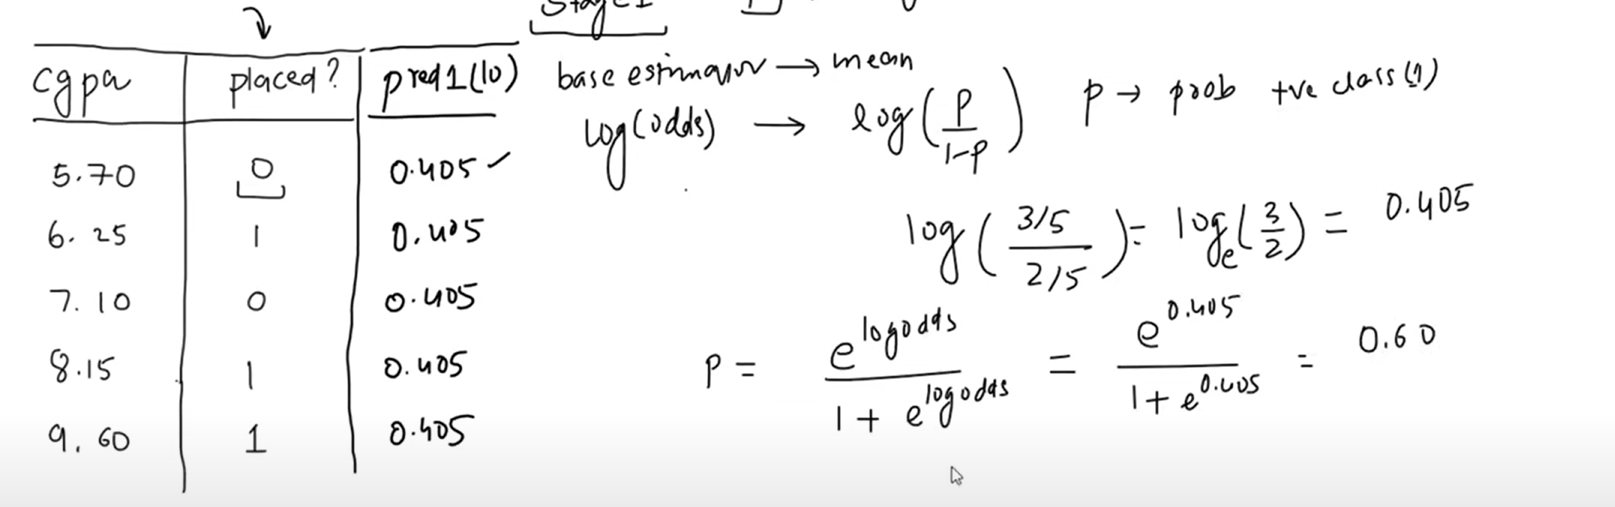

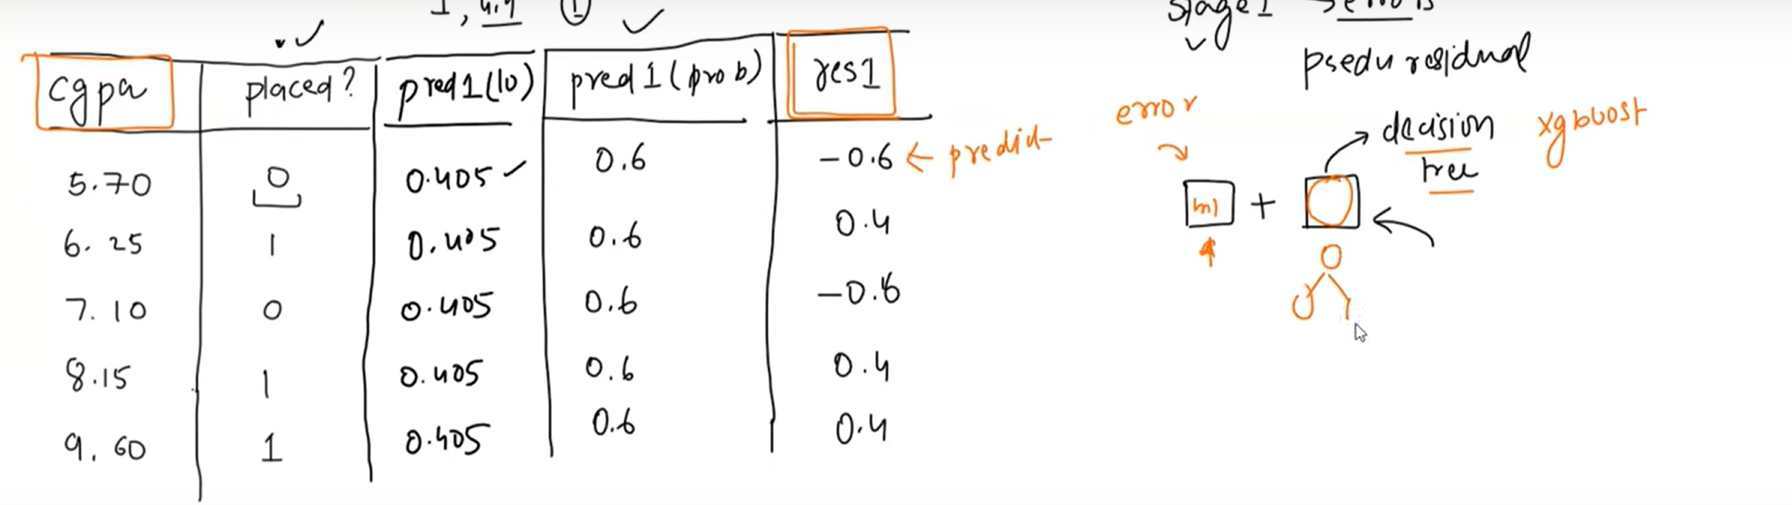

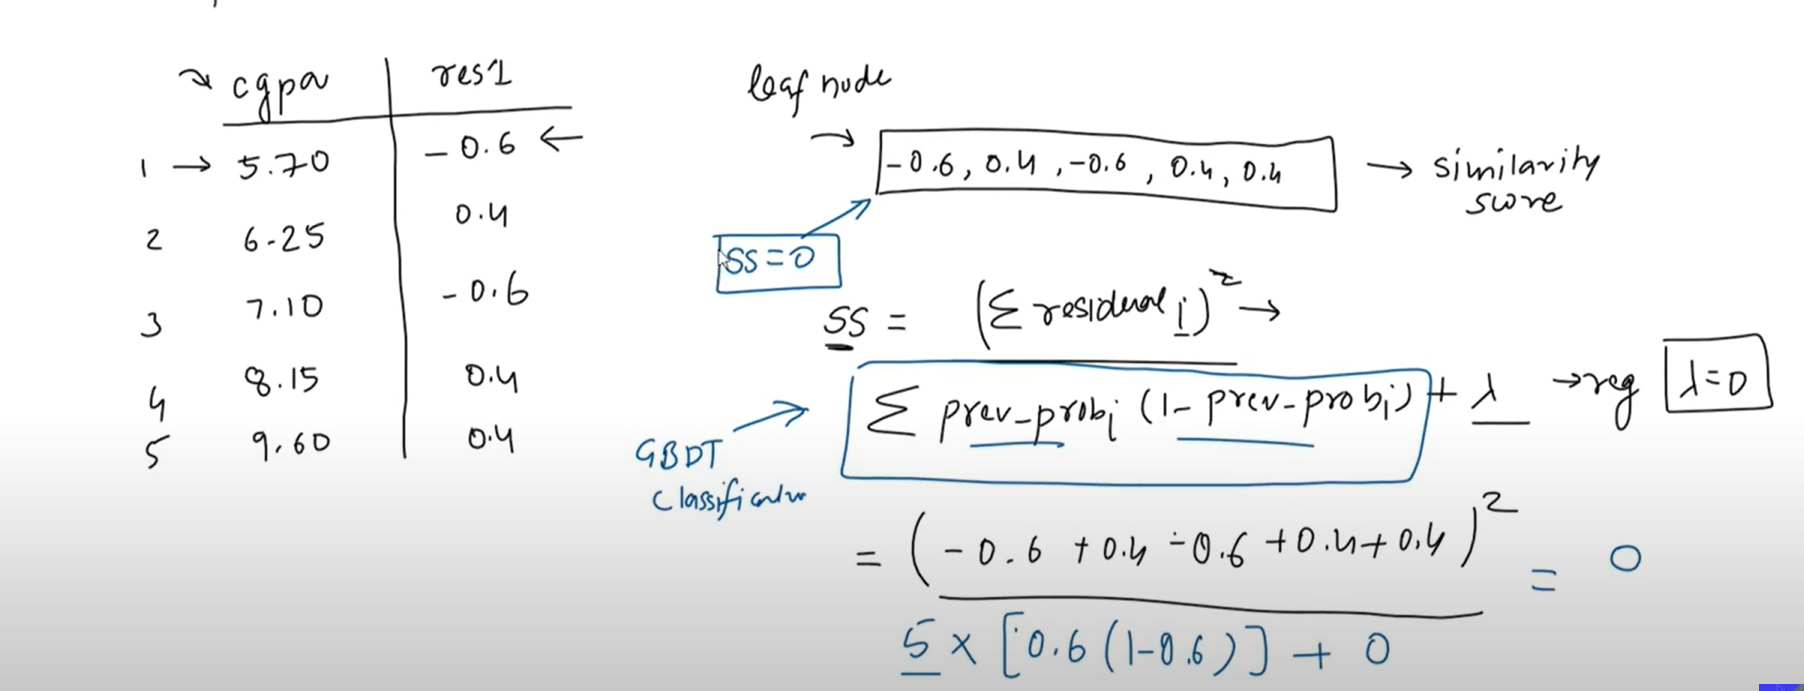

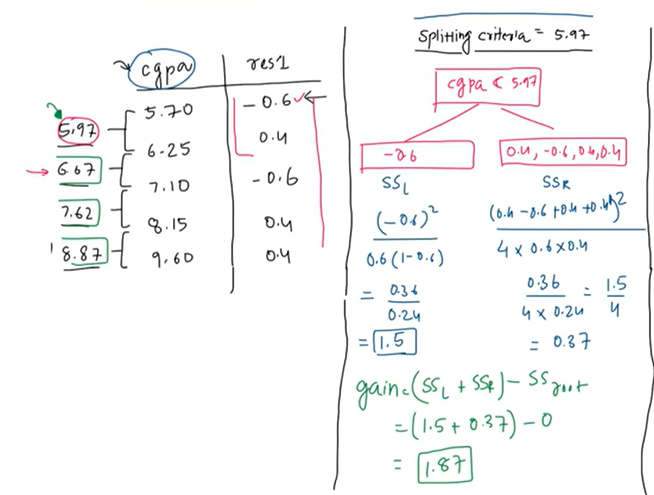

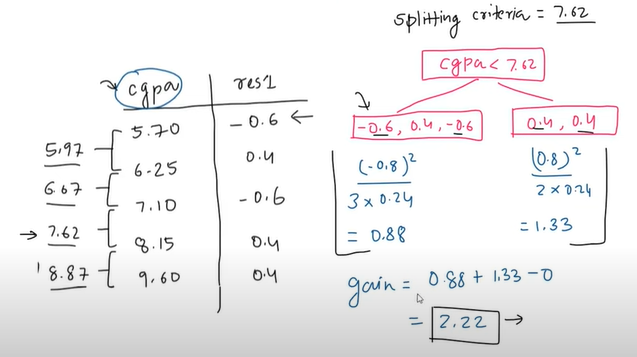

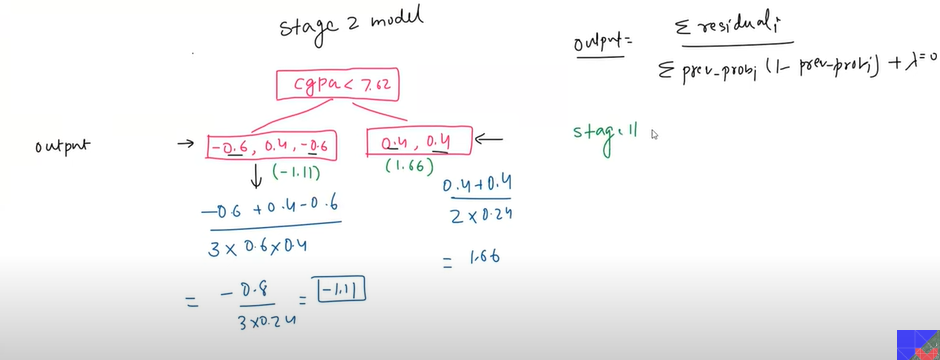

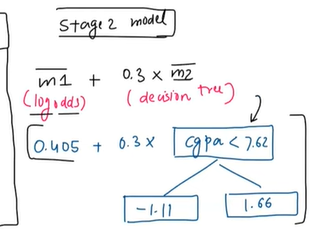

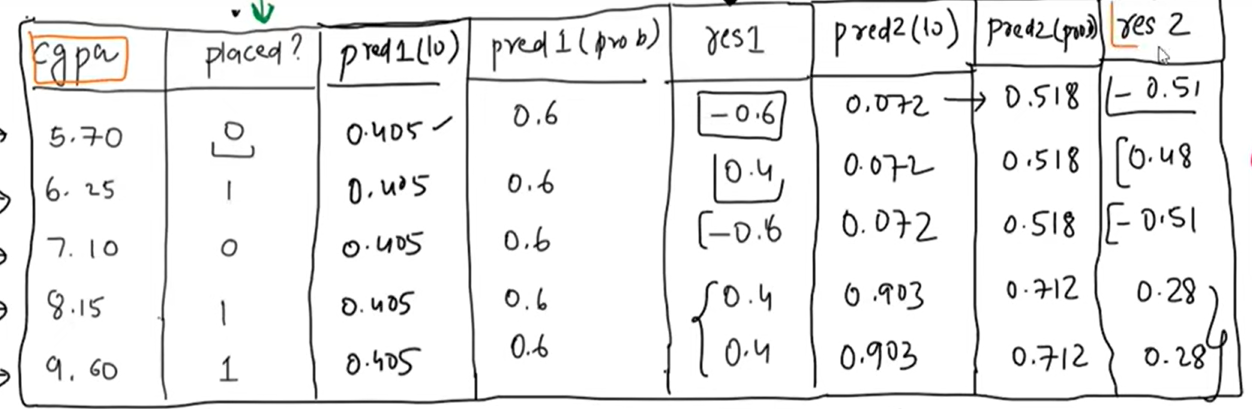